#array testing


In [3]:
def nablaT(G):
    h, w = G.shape[:2]
    I = np.zeros((h, w), G.dtype)
    # note that we just reversed left and right sides
    # of each line to obtain the transposed operator
    I[:, :-1] -= G[:, :-1, 0]
    I[:, 1: ] += G[:, :-1, 0]
    I[:-1]    -= G[:-1, :, 1]
    I[1: ]    += G[:-1, :, 1]
    return I

def nabla(I):
    h, w = I.shape
    G = np.zeros((h, w, 2), I.dtype)
    G[:, :-1, 0] -= I[:, :-1]
    G[:, :-1, 0] += I[:, 1:]
    G[:-1, :, 1] -= I[:-1]
    G[:-1, :, 1] += I[1:]
    return G

def anorm2(a):
    return (a*a).sum(-1)
def anorm(a):
    return np.sqrt( anorm2(a) )

def project_nd(P, r):
    '''perform a pixel-wise projection onto R-radius balls'''
    nP = np.maximum(1.0, anorm(P)/r)
    return P / nP[...,np.newaxis]


img [[1. 0. 5.]]
new [[0. 0. 0.]]
nabla(img) [[[-1.  0.]
  [ 5.  0.]
  [ 0.  0.]]]


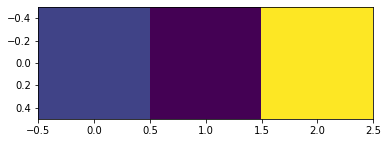

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

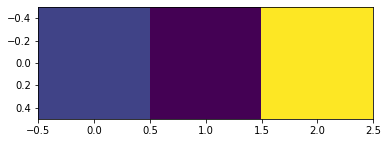

In [14]:
import glob
from PIL import Image
import cv2 
import numpy as np
import types
import os
#from nbutils import showarray
from matplotlib import pyplot as plt
import scipy
import skimage

def solve_TVL1_multy(img, iter_n=101):
    print("img",img)
    new =  np.zeros((1,3))
    print("new", new)
    print("nabla(img)",nabla(img))
    
   # print("nablaT(img)",nablaT(img))
    for y in range(0, img.shape[0]):
        X = new[y]
        print("X", X)
        #for x in range(0, width):

        #new = np.concatenate((new,X), axis=0)
        new[y] = X           
    return new

z = np.zeros((1,3))
z[0][0] = 1
z[0][2] = 5
imgO = solve_TVL1_multy(z, 0.5)
#print("imgO",imgO)
plt.imshow(z)
plt.show()
plt.imshow(imgO)
plt.show()

In [58]:
import glob
from PIL import Image
import cv2 
import numpy as np
import types
import os
#from nbutils import showarray
from matplotlib import pyplot as plt
import scipy
import skimage


def solve_TVL1_multy(img, clambda):
    L2 = 8.0
    tau = 0.02
    sigma = 1.0 / (L2*tau)
    theta = 1.0
    #print("img",img)
    new =  np.zeros_like(img)
    Rs = np.zeros_like(img)
    m = np.empty_like(img)
    print("m", m)
    #print("new", new)
#    for y in range(0, int((img.shape[0])/3)):
    for y in range(101):
        X = img[0].copy()
        P = nabla(img[0])
        #print("P",P)
        P = project_nd( P + sigma*nabla(img[0]), 1.0 )
        Rs = np.clip(Rs + sigma*(X-img), -clambda, clambda)
        X1 = X - tau*(nablaT(P) + Rs.sum(0))
        X = X1 + theta * (X1 - X)
        print("X", X)
        #for x in range(0, width):
       
        m = np.concatenate((m,X), axis=0)
        #new[y] = X           
    return m
z = np.zeros((5,3))
z[0][0] = 1
z[0][2] = 5
img_ref = cv2.imread("smiley2.jpg")
imgO = solve_TVL1_multy(img_ref, 0.5)
#print("imgO",imgO)
plt.imshow(img_ref)
plt.show()
plt.imshow(imgO)
plt.show()


m [[[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
X [[237.94099952 243.95554678 238.91120418]
 [218.90178786 229.91372284 251.89654836]
 [204.90353757 227.89882665 242.89758506]
 [198.91672146 219.90684594 246.86503371]
 [220.94328289 234.92189218 252.87249021]
 [254.92301288 253.87096189 249.84      ]]


ValueError: all the input arrays must have same number of dimensions